# Used Car Price Prediction

## Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [6]:
df= pd.read_csv("car_data.csv")

In [7]:
df.head(5)

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition,Years Used
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2,7
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4,8
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8,3
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3,8
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3,8


In [8]:
df.shape

(2237, 10)

In [9]:
df.dtypes

Model                 object
Selling Price          int64
Kilometers Driven      int64
Year                   int64
Owner                 object
Fuel Type             object
Transmission          object
Insurance             object
Car Condition        float64
Years Used             int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Model              2237 non-null   object 
 1   Selling Price      2237 non-null   int64  
 2   Kilometers Driven  2237 non-null   int64  
 3   Year               2237 non-null   int64  
 4   Owner              2237 non-null   object 
 5   Fuel Type          2237 non-null   object 
 6   Transmission       2237 non-null   object 
 7   Insurance          2223 non-null   object 
 8   Car Condition      2237 non-null   float64
 9   Years Used         2237 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 174.9+ KB


In [11]:
df.describe()

,Selling Price,Kilometers Driven,Year,Car Condition,Years Used
count,2.237000e+03,2237.000000,2237.000000,2237.000000,2237.000000
mean,4.184431e+05,61928.605275,2013.763523,4.370854,7.236477
std,2.280516e+05,42260.955917,2.874686,0.288990,2.874686
min,7.529900e+04,913.000000,2006.000000,3.000000,1.000000
25%,2.720990e+05,32137.000000,2012.000000,4.200000,5.000000
50%,3.557990e+05,55430.000000,2014.000000,4.300000,7.000000
75%,5.032990e+05,83427.000000,2016.000000,4.600000,9.000000
max,1.952397e+06,855881.000000,2020.000000,5.000000,15.000000


In [12]:
#OBSERVATION:
#Maximum Kms Driven is exceeding even above 1.5*IOR this impliers there could be outliers present

In [13]:
df["Model"].value_counts()

MarutiSwift                118
MarutiAltoK10               83
MarutiWagonR1.0             80
MarutiAlto800               63
MarutiSwiftDzireVDIBS       52
                          ... 
HyundaiVENUE1.4CRDIMT        1
MahindraXUV500W11            1
HyundaiNewElantraS1.6        1
MarutiBalenoDELTA1.2K12      1
HyundaiEonD                  1
Name: Model, Length: 434, dtype: int64

In [14]:
df["Owner"].value_counts()

First Owner     1707
Second Owner     452
Third Owner       78
Name: Owner, dtype: int64

In [15]:
df.Transmission.value_counts()

MANUAL       1909
AUTOMATIC     170
HR26            9
MH02            9
DL4C            8
MH12            8
KA05            7
MH03            6
DL12            6
MH04            6
KA01            5
MH01            5
KA03            4
MH47            4
DL3C            4
MH43            4
KA50            4
KA51            4
HR51            4
DL5C            4
RJ14            3
DL8C            3
KA04            3
KA53            3
TS07            3
GJ27            3
MH14            2
DL2C            2
UP32            2
TS08            2
MH05            2
KA02            2
UP14            2
PB11            1
DL11            1
HR05            1
TS09            1
TN12            1
PB10            1
GJ06            1
DL14            1
HR12            1
DL1C            1
Ch01            1
HR03            1
UP78            1
MH46            1
TN06            1
DL9C            1
GJ01            1
GJ05            1
DL10            1
HR29            1
GJ18            1
TN02            1
PB91      

In [16]:
df["Fuel Type"].value_counts()

Petrol          1384
Diesel           686
Petrol + CNG     158
Petrol + LPG       9
Name: Fuel Type, dtype: int64

In [17]:
df.Year.value_counts()

2012    314
2013    275
2014    252
2015    252
2017    212
2016    196
2011    179
2018    164
2010    137
2009     88
2019     82
2008     53
2007     23
2020      8
2006      2
Name: Year, dtype: int64

In [18]:
df.corrwith(df["Selling Price"])

C:\Users\gowth\AppData\Local\Temp\ipykernel_16380\3365614220.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df["Selling Price"])


Selling Price        1.000000
Kilometers Driven   -0.163254
Year                 0.568156
Car Condition        0.435813
Years Used          -0.568156
dtype: float64

C:\Users\gowth\AppData\Local\Temp\ipykernel_16380\980228561.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)


Text(0.5, 1.0, 'Correlation Matrix')

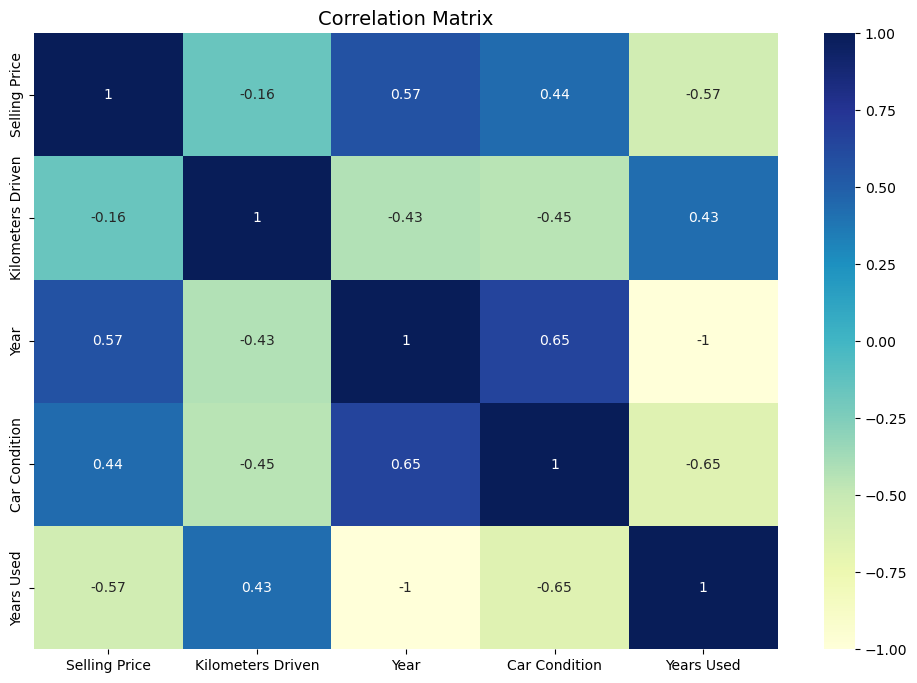

In [19]:
# Correlation plot
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.title("Correlation Matrix", fontsize=14)

In [20]:
#Observation
#this heat map implies us that our label column Selling Price has a good correlation with Car Condition.

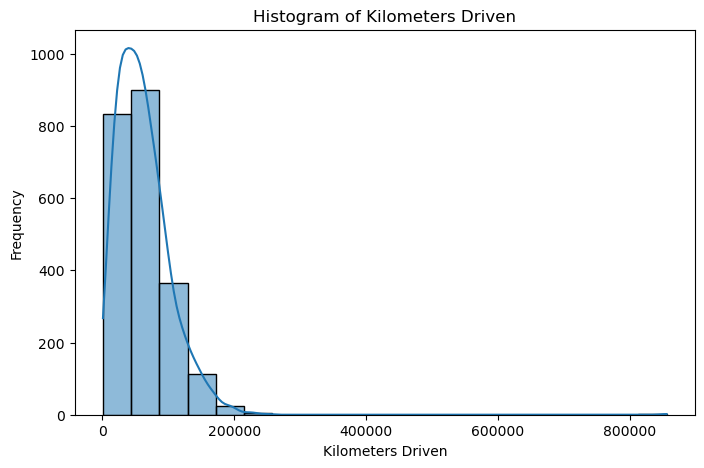

In [21]:
plt.figure(figsize=(8, 5))
sns.color_palette("Set1")
sns.histplot(df['Kilometers Driven'], bins=20, kde=True)
plt.title('Histogram of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

In [22]:
#OBSERVATION:
#So Histogram plot tells us how well the data is distributed,from the above observation the Kms driven column is skewed towards left.
#it also implies the presence of outliers.

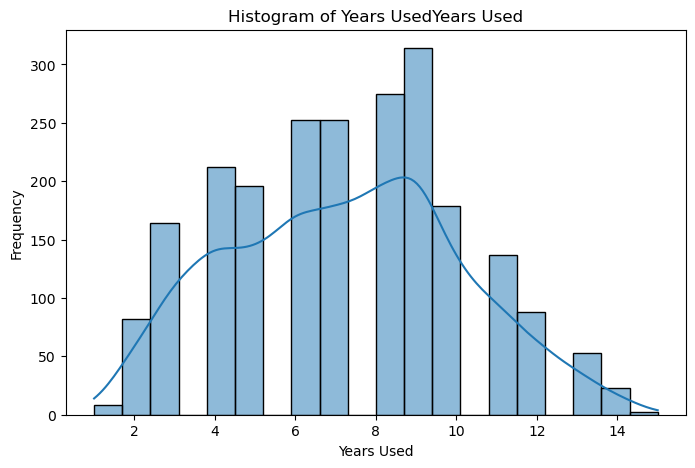

In [23]:
plt.figure(figsize=(8, 5))
sns.color_palette("Set1")
sns.histplot(df['Years Used'], bins=20, kde=True)
plt.title('Histogram of Years UsedYears Used')
plt.xlabel('Years Used')
plt.ylabel('Frequency')
plt.show()

In [24]:
#OBSERVATION:
#So Histogram plot tells us how well the data is distributed,from the above observation the No of years used column follows a normal distribution 


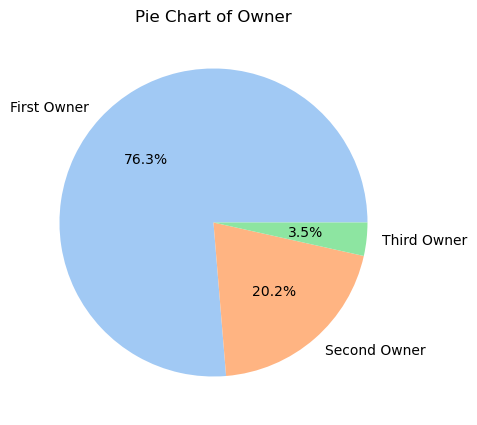

In [25]:
plt.figure(figsize=(8, 5))
df['Owner'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Owner')
plt.ylabel('')
plt.show()

In [26]:
#OBSERVATION:
#from this pie chart we can infer that relatively first owner has highest propotion
#first owner has a ratio of 7.6 whereas the second owner ratio is 2

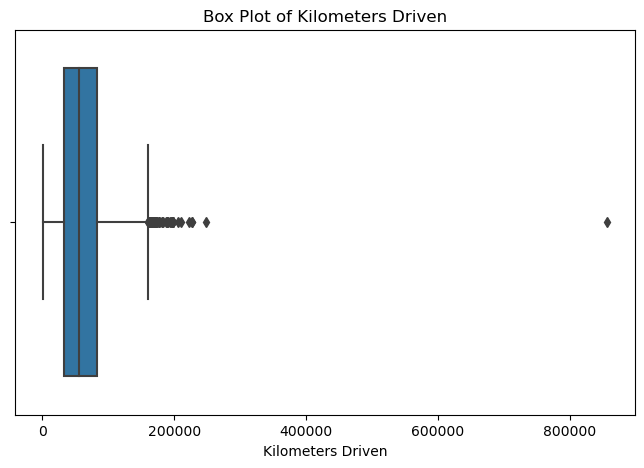

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Kilometers Driven'])
plt.title('Box Plot of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.show()

In [28]:
#OBSERVATION:
#This box plot indicates a clear picture of presence of outliers in Kilometers Driven column

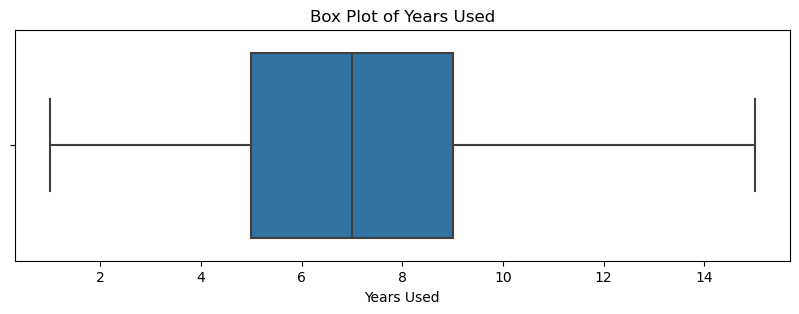

In [29]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Years Used'])
plt.title('Box Plot of Years Used')
plt.xlabel('Years Used')
plt.show()

In [30]:
#OBSERVATION:
#This box plot indicates the absence of outliers.

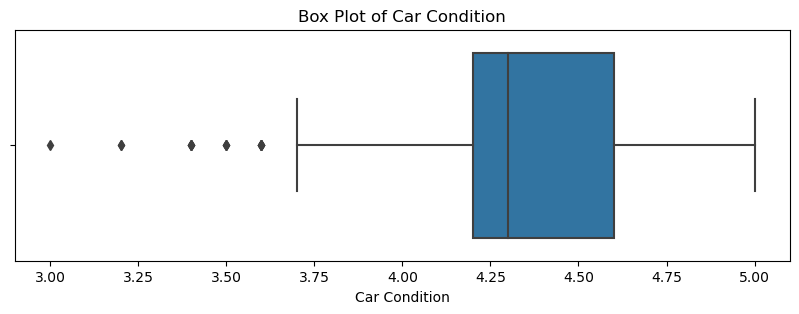

In [31]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Car Condition'])
plt.title('Box Plot of Car Condition')
plt.xlabel('Car Condition')
plt.show()

In [32]:
#OBSERVATION:
#This box plot indicates a clear picture of presence of outliers in Car Condition column towards the minimum range of value

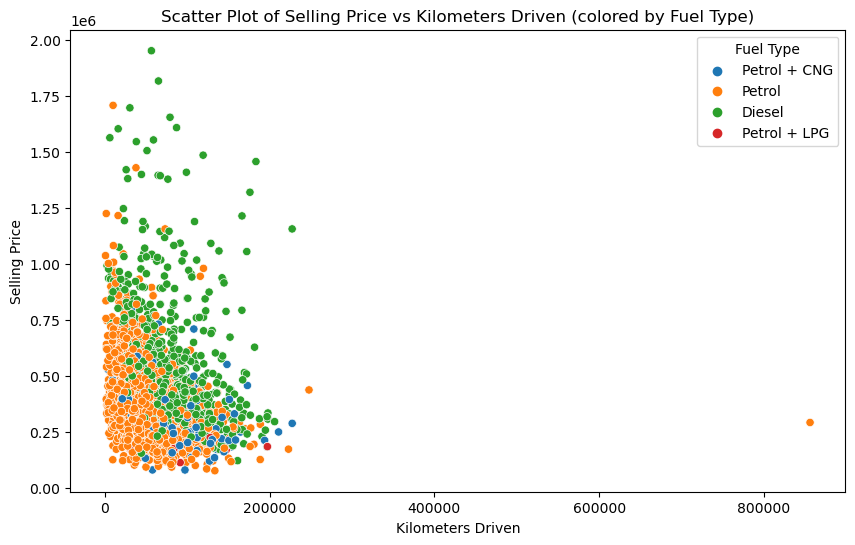

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Kilometers Driven', y='Selling Price', hue='Fuel Type', data=df[df['Selling Price']>0])
plt.title('Scatter Plot of Selling Price vs Kilometers Driven (colored by Fuel Type)')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.legend(title='Fuel Type')
plt.show()

In [34]:
#OBSERVATION:
#From this Scatter Plot we can infer that there is a good Correlation between Kilometers Driven and Selling Price and we can see that there are some presence of Outliers.

# Data preprocessing 

In [35]:
df.columns

Index(['Model', 'Selling Price', 'Kilometers Driven', 'Year', 'Owner',
       'Fuel Type', 'Transmission', 'Insurance', 'Car Condition',
       'Years Used'],
      dtype='object')

In [36]:
df= df.drop(columns=['Year','Insurance','Model','Transmission'])

In [37]:
df=df.dropna()

In [38]:
df.shape

(2237, 6)

In [39]:
df.columns

Index(['Selling Price', 'Kilometers Driven', 'Owner', 'Fuel Type',
       'Car Condition', 'Years Used'],
      dtype='object')

In [51]:
df_num = df.select_dtypes(include="number")
df_num

,Selling Price,Kilometers Driven,Car Condition,Years Used
0,312165,82238,4.2,7
1,313799,30558,4.4,8
2,295999,22164,4.8,3
3,435199,30535,4.3,8
4,289099,15738,4.3,8
...,...,...,...,...
2231,590999,68638,4.4,5
2232,385999,45263,4.4,6
2233,324099,100335,4.3,9
2235,378899,87947,4.2,8


In [52]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [53]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [54]:
lower_bound

Selling Price       -32701.00
Kilometers Driven   -41590.50
Car Condition            3.75
Years Used              -1.00
dtype: float64

In [55]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [56]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

C:\Users\gowth\AppData\Local\Temp\ipykernel_16380\632167277.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]


In [57]:
#Outliers are removed.

In [58]:
upper_bound

Selling Price        772899.00
Kilometers Driven    155701.50
Car Condition             4.95
Years Used               15.00
dtype: float64

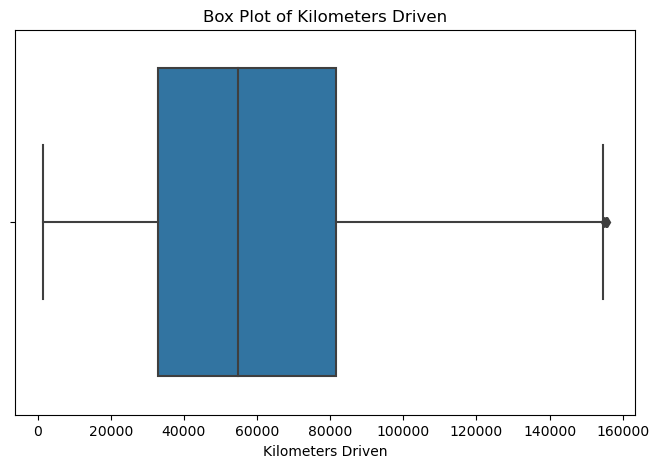

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Kilometers Driven'])
plt.title('Box Plot of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.show()

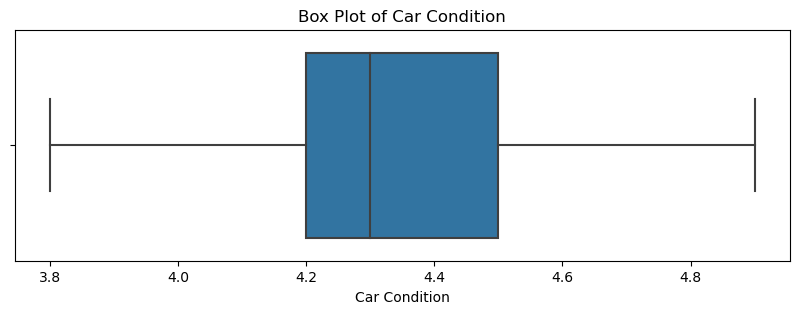

In [60]:
plt.figure(figsize=(10,3))
sns.boxplot(x=df['Car Condition'])
plt.title('Box Plot of Car Condition')
plt.xlabel('Car Condition')
plt.show()

In [61]:
df.shape

(1993, 6)

In [62]:
df_num.head()

,Selling Price,Kilometers Driven,Car Condition,Years Used
0,312165,82238,4.2,7
1,313799,30558,4.4,8
2,295999,22164,4.8,3
3,435199,30535,4.3,8
4,289099,15738,4.3,8


In [63]:
df_num.shape

(2061, 4)

In [64]:
X = df.drop('Selling Price', axis=1)
y = df['Selling Price']
X.head()

,Kilometers Driven,Owner,Fuel Type,Car Condition,Years Used
0,82238,First Owner,Petrol + CNG,4.2,7
1,30558,First Owner,Petrol,4.4,8
2,22164,First Owner,Petrol,4.8,3
3,30535,First Owner,Diesel,4.3,8
4,15738,First Owner,Petrol,4.3,8


In [65]:
X_num = X.select_dtypes('number')
X_num.head()

,Kilometers Driven,Car Condition,Years Used
0,82238,4.2,7
1,30558,4.4,8
2,22164,4.8,3
3,30535,4.3,8
4,15738,4.3,8


In [66]:
X_cat = X.select_dtypes('object')
X_cat.head()

,Owner,Fuel Type
0,First Owner,Petrol + CNG
1,First Owner,Petrol
2,First Owner,Petrol
3,First Owner,Diesel
4,First Owner,Petrol


### One Hot Encoding

In [67]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [68]:
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [69]:
X_num_scaled.describe()

,Kilometers Driven,Car Condition,Years Used
count,1993.000000,1993.000000,1993.000000
mean,0.375782,0.512202,0.455738
std,0.219923,0.238673,0.198911
min,0.000000,0.000000,0.000000
25%,0.203165,0.363636,0.285714
50%,0.346337,0.454545,0.428571
75%,0.519431,0.636364,0.571429
max,1.000000,1.000000,1.000000


In [70]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)

In [71]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [72]:
X

,Kilometers Driven,Car Condition,Years Used,Owner_First Owner,Owner_Second Owner,Owner_Third Owner,Fuel Type_Diesel,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG
0,0.523972,0.363636,0.428571,1,0,0,0,0,1,0
1,0.188684,0.545455,0.500000,1,0,0,0,1,0,0
2,0.134226,0.909091,0.142857,1,0,0,0,1,0,0
3,0.188535,0.454545,0.500000,1,0,0,1,0,0,0
4,0.092535,0.454545,0.500000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2231,0.435739,0.545455,0.285714,1,0,0,1,0,0,0
2232,0.284087,0.545455,0.357143,0,1,0,0,1,0,0
2233,0.641382,0.454545,0.571429,0,1,0,0,1,0,0
2235,0.561011,0.363636,0.500000,1,0,0,1,0,0,0


In [73]:
X.shape, X_num_scaled.shape, X_cat_encoded.shape

((1993, 10), (1993, 3), (1993, 7))

In [74]:
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)

Kilometers Driven         0
Car Condition             0
Years Used                0
Owner_First Owner         0
Owner_Second Owner        0
Owner_Third Owner         0
Fuel Type_Diesel          0
Fuel Type_Petrol          0
Fuel Type_Petrol + CNG    0
Fuel Type_Petrol + LPG    0
dtype: int64
0
(1993, 10)
(1993,)


In [75]:
X.describe()

,Kilometers Driven,Car Condition,Years Used,Owner_First Owner,Owner_Second Owner,Owner_Third Owner,Fuel Type_Diesel,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000
mean,0.375782,0.512202,0.455738,0.759659,0.205218,0.035123,0.268440,0.652785,0.074762,0.004014
std,0.219923,0.238673,0.198911,0.427398,0.403962,0.184137,0.443259,0.476204,0.263072,0.063245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.203165,0.363636,0.285714,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.346337,0.454545,0.428571,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.519431,0.636364,0.571429,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
X.head(5)

,Kilometers Driven,Car Condition,Years Used,Owner_First Owner,Owner_Second Owner,Owner_Third Owner,Fuel Type_Diesel,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG
0,0.523972,0.363636,0.428571,1,0,0,0,0,1,0
1,0.188684,0.545455,0.500000,1,0,0,0,1,0,0
2,0.134226,0.909091,0.142857,1,0,0,0,1,0,0
3,0.188535,0.454545,0.500000,1,0,0,1,0,0,0
4,0.092535,0.454545,0.500000,1,0,0,0,1,0,0


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(1395, 10)
(598, 10)
(1395,)
(598,)


In [79]:
X_train.columns

Index(['Kilometers Driven', 'Car Condition', 'Years Used', 'Owner_First Owner',
       'Owner_Second Owner', 'Owner_Third Owner', 'Fuel Type_Diesel',
       'Fuel Type_Petrol', 'Fuel Type_Petrol + CNG', 'Fuel Type_Petrol + LPG'],
      dtype='object')

### Linear Regression 

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [81]:
X_train.head(1)

,Kilometers Driven,Car Condition,Years Used,Owner_First Owner,Owner_Second Owner,Owner_Third Owner,Fuel Type_Diesel,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG
642,0.182118,0.636364,0.214286,0,1,0,0,1,0,0


In [82]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [83]:
model.intercept_, model.coef_

(535208.1576362303,
 array([  -7583.94673263,   47635.36421964, -445998.52534423,
           3500.45805352,   -1216.57371099,   -2283.88434253,
          91202.33883286,    -929.7876991 ,  -56804.55994628,
         -33467.99118748]))

In [84]:
yhat_train = model.predict(X_train)

In [85]:
rsq=model.score(X_train,y_train)
rsq

0.5215667385959637

In [86]:
yhat_test = model.predict(X_test)

In [87]:
model_MSE_train = np.mean((y_train - yhat_train)**2)
model_MSE_test = np.mean((y_test - yhat_test)**2)
model_MSE_train, model_MSE_test

(10630323423.22808, 11244752274.60723)

In [88]:
mean_squared_error(y_test, model.predict(X_test))**(1/2)

106041.27627771758

In [89]:
# compute MAPE on train and test
model_MAPE_train = np.mean((abs(y_train - yhat_train)/y_train)*100)
model_MAPE_test = np.mean((abs(y_test - yhat_test)/y_test)*100)

In [90]:
model_performance = {'R Sq':rsq,'train_MSE':model_MSE_train,'test_MSE':model_MSE_test,'train_MAPE':model_MAPE_train,'test_MAPE':model_MAPE_test}

In [91]:
model_performance

{'R Sq': 0.5215667385959637,
 'train_MSE': 10630323423.22808,
 'test_MSE': 11244752274.60723,
 'train_MAPE': 23.98180289560209,
 'test_MAPE': 24.608515741078616}

In [92]:
#Observation:
#Overall, the linear regression model provides a moderate fit to the data with an R Square of 0.522 and demonstrates relatively low MAPE values for both training and test datasets
# Model provides accurate predictions, but there is still room for improvement in explaining the remaining unaccounted variance.

In [93]:
Xrm_train = sm.add_constant(X_train)

In [94]:
Xrm_train.head()

,const,Kilometers Driven,Car Condition,Years Used,Owner_First Owner,Owner_Second Owner,Owner_Third Owner,Fuel Type_Diesel,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Fuel Type_Petrol + LPG
642,1.0,0.182118,0.636364,0.214286,0,1,0,0,1,0,0
623,1.0,0.277541,0.636364,0.214286,1,0,0,0,0,1,0
775,1.0,0.157984,0.727273,0.142857,1,0,0,0,1,0,0
1928,1.0,0.534191,0.545455,0.285714,1,0,0,1,0,0,0
1511,1.0,0.713500,0.363636,0.714286,1,0,0,0,1,0,0


In [95]:
sm_model = sm.OLS(y_train,Xrm_train)
results = sm_model.fit()

In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling Price   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     188.9
Date:                Mon, 06 Nov 2023   Prob (F-statistic):          1.04e-215
Time:                        18:42:07   Log-Likelihood:                -18083.
No. Observations:                1395   AIC:                         3.618e+04
Df Residuals:                    1386   BIC:                         3.623e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    3.38e+05   1.24e+04     27.185      0.000    3.14e+05    3.62e+05
Kilometers Driven      -7583.9467   1.64e+04     -0.461      0.645   -3.98e+04    2.47e+04
Car Condition           4.764e+04   1.55e+04      3.081      0.002    1.73e+04     7.8e+04
Years Used              -4.46e+05   1.86e+04    -23.962      0.000   -4.83e+05   -4.09e+05
Owner_First Owner       1.162e+05   6231.055     18.645      0.000    1.04e+05    1.28e+05
Owner_Second Owner      1.115e+05   7078.860     15.745      0.000    9.76e+04    1.25e+05
Owner_Third Owner       1.104e+05   1.22e+04      9.027      0.000    8.64e+04    1.34e+05
Fuel Type_Diesel        1.757e+05   1.06e+04     16.529      0.000    1.55e+05    1.97e+05
Fuel Type_Petrol        8.358e+04   1.01e+04      8.290      0.000    6.38e+04    1.03e+05
Fuel Type_Petrol + CNG   2.77e+04   1.22e+04      2.274      0.023    3800.541    5.16e+04
Fuel Type_Petrol + LPG  5.104e+04   3.37e+04      1.513      0.130   -1.51e+04    1.17e+05
==============================================================================
Omnibus:                       23.222   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.248
Skew:                           0.296   Prob(JB):                     5.43e-06
Kurtosis:                       3.258   Cond. No.                     1.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## KNN Regression

In [97]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [98]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 11, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)
train_mape_scores,test_mape_scores

([0.0,
  0.18883895167067696,
  0.2112378286834058,
  0.2239966781960074,
  0.23028170571242984],
 [0.3481561270613937,
  0.2746549950506044,
  0.26217272307207706,
  0.252494377048359,
  0.25244561124972525])

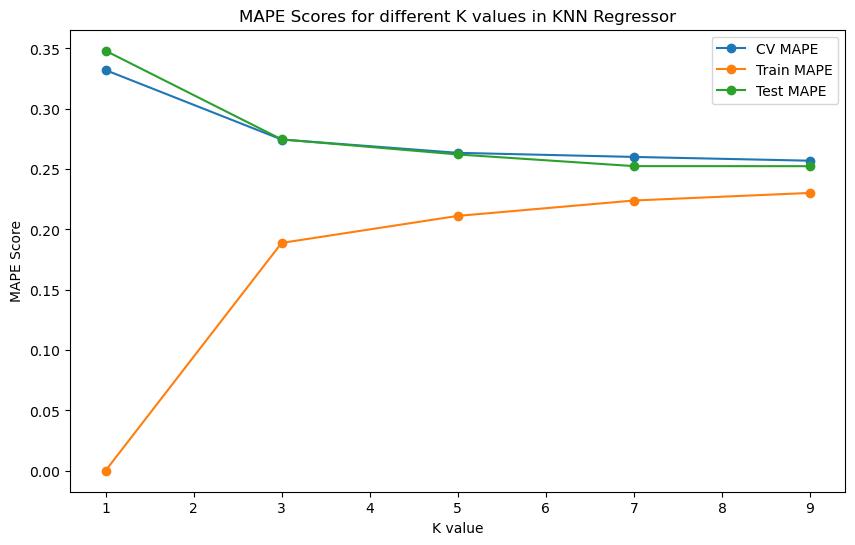

The best K value for CV is 9.


In [376]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='o', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='o', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

In [377]:
K = 9
model = KNeighborsRegressor(n_neighbors = K)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = mean_squared_error(y_test,pred) #calculate rmse
print(pred,K)

[357892.66666667 321157.44444444 491099.         292103.
 351321.22222222 491099.         363510.22222222 364811.44444444
 260957.         395258.33333333 488476.77777778 292610.22222222
 208360.         485503.55555556 397934.11111111 425360.77777778
 485721.22222222 176685.66666667 380925.77777778 370432.33333333
 417276.77777778 223249.33333333 192626.55555556 392428.55555556
 481538.55555556 268060.33333333 253732.33333333 366276.77777778
 340927.55555556 422237.66666667 326499.         291532.33333333
 425360.77777778 417854.66666667 332588.55555556 328325.77777778
 564759.11111111 300601.22222222 386816.66666667 374521.22222222
 426395.88888889 414288.44444444 669565.66666667 370284.44444444
 403827.11111111 433043.44444444 358056.22222222 417121.22222222
 255402.22222222 273001.88888889 271087.88888889 213142.44444444
 201364.77777778 582863.55555556 252576.77777778 330343.44444444
 315776.77777778 410424.55555556 483834.         221633.77777778
 228941.11111111 496577.33333333 

## Decision Tree

In [110]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_percentage_error

In [104]:
dtr = DecisionTreeRegressor(max_depth=10)

In [105]:
model = dtr.fit(X,y)

In [106]:
export_graphviz(model, out_file ='tree.dot')

[Text(0.4780534351145038, 0.9545454545454546, 'Years Used <= 0.464\nsquared_error = 21492691032.502\nsamples = 1993\nvalue = 374736.052'),
 Text(0.2195198646773074, 0.8636363636363636, 'Fuel Type_Diesel <= 0.5\nsquared_error = 20105073659.457\nsamples = 1005\nvalue = 454545.223'),
 Text(0.11753990284524636, 0.7727272727272727, 'Years Used <= 0.25\nsquared_error = 18333172325.395\nsamples = 748\nvalue = 428915.452'),
 Text(0.07065405968077723, 0.6818181818181818, 'Car Condition <= 0.955\nsquared_error = 18592401374.873\nsamples = 313\nvalue = 477421.687'),
 Text(0.03756072172102706, 0.5909090909090909, 'Fuel Type_Petrol <= 0.5\nsquared_error = 16455273287.623\nsamples = 242\nvalue = 462725.839'),
 Text(0.020298403886190145, 0.5, 'Years Used <= 0.107\nsquared_error = 7097079117.634\nsamples = 43\nvalue = 422038.395'),
 Text(0.007633587786259542, 0.4090909090909091, 'Kilometers Driven <= 0.088\nsquared_error = 1926934375.0\nsamples = 8\nvalue = 488474.0'),
 Text(0.002775850104094379, 0.31

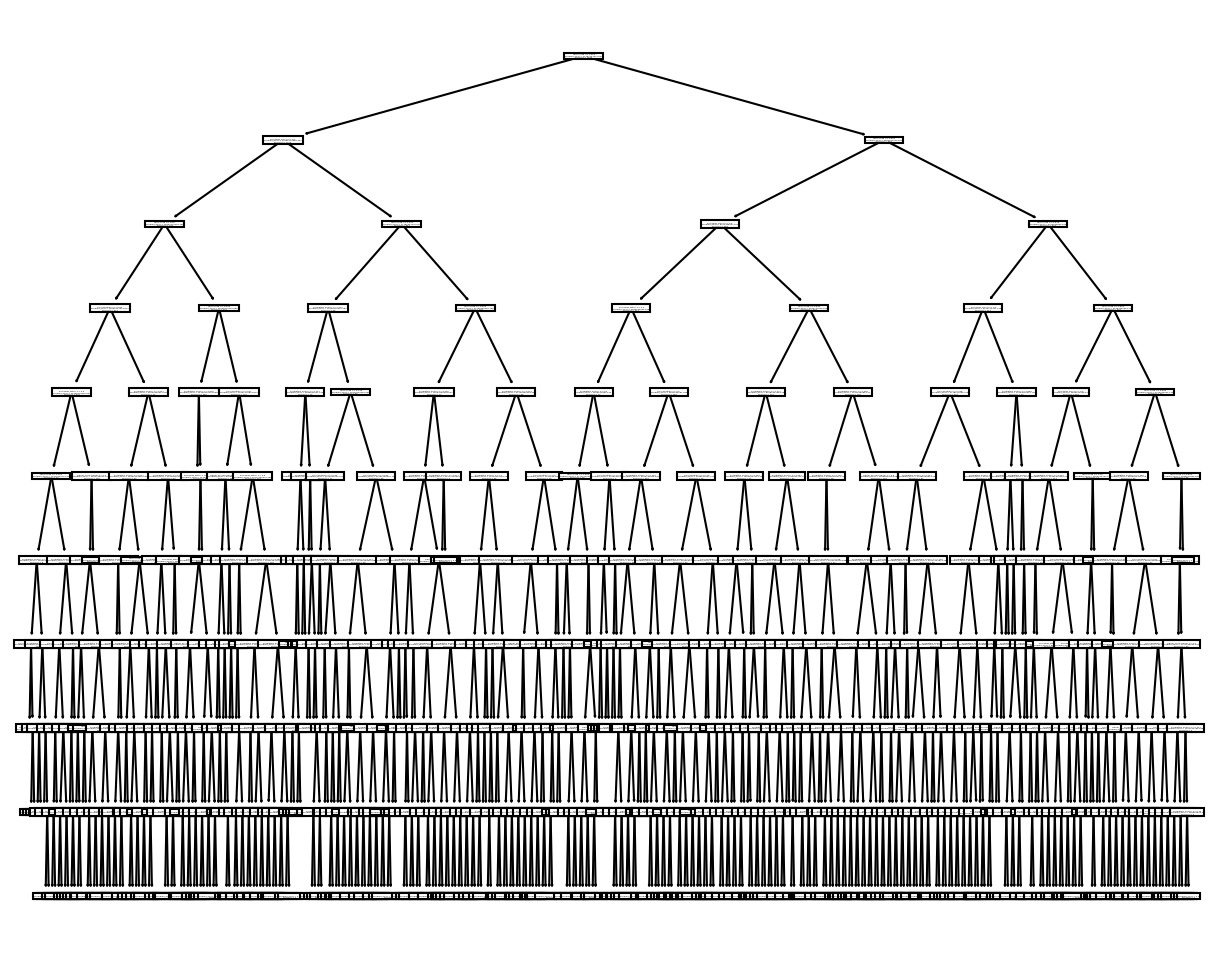

In [404]:
feature_names =X.columns
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=feature_names)

In [99]:
mean_squared_error(y_train, model.predict(X_train))

10630323423.22808

In [100]:
mean_squared_error(y_test, model.predict(X_test))

11244752274.60723

In [107]:
TRA=[]
TES=[]

In [112]:
for d in range(1,10):
    dtr = DecisionTreeRegressor(max_depth=d)
    model = dtr.fit(X,y)
    a=mean_absolute_percentage_error(y_train, model.predict(X_train))
    TRA.append(a)
    b=mean_absolute_percentage_error(y_test, model.predict(X_test))
    TES.append(b)
TRA,TES
    
    

([15437350355.136173,
  12902225253.29514,
  11008732678.568548,
  10356139444.705637,
  9783988151.29711,
  9213800821.327343,
  8576431431.034137,
  7914856118.81075,
  7148316922.231931,
  0.3149805395089401,
  0.27405078900107316,
  0.25233072177598137,
  0.24066481043586052,
  0.23168155974975815,
  0.22072249531035834,
  0.21116665951186783,
  0.1986371596750706,
  0.18095843772793868],
 [14025053981.285675,
  12907141066.60557,
  11120052043.948374,
  10578449656.236357,
  10335029659.67342,
  9944367113.42117,
  9185897742.932491,
  8220288304.067291,
  7363278399.647,
  0.2921646705384189,
  0.2672991627970876,
  0.24392930862301365,
  0.23514611077942138,
  0.23229379616225596,
  0.22770128146437138,
  0.21705816584599794,
  0.20230795486626987,
  0.18635445578521967])

## observation:

Among the three models (Linear Regression, KNN, and Decision Tree), the KNN model consistently demonstrates the lowest MAPE values on both the training and test datasets, which is indicative of its strong predictive performance and ability to generalize well to new, unseen data. Therefore, based on the metrics, the KNN model appears to be the most suitable for this particular task and performs the best among the three models.
